In [1]:
from keras.utils import to_categorical
from keras_preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os 
import pandas as pd 
import numpy as np

In [2]:
TRAIN_DIR = 'confident-unconfident/train'
TEST_DIR = 'confident-unconfident/test'

In [3]:
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir, label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label,"completed")
    return image_paths,labels

In [4]:
train = pd.DataFrame()
train['image'], train['label'] = createdataframe(TRAIN_DIR)

confident completed
unconfident completed


In [5]:
print(train)

                                                   image        label
0      confident-unconfident/train\confident\Training...    confident
1      confident-unconfident/train\confident\Training...    confident
2      confident-unconfident/train\confident\Training...    confident
3      confident-unconfident/train\confident\Training...    confident
4      confident-unconfident/train\confident\Training...    confident
...                                                  ...          ...
28702  confident-unconfident/train\unconfident\Traini...  unconfident
28703  confident-unconfident/train\unconfident\Traini...  unconfident
28704  confident-unconfident/train\unconfident\Traini...  unconfident
28705  confident-unconfident/train\unconfident\Traini...  unconfident
28706  confident-unconfident/train\unconfident\Traini...  unconfident

[28707 rows x 2 columns]


In [6]:
test = pd.DataFrame()
test['image'], test['label'] = createdataframe(TEST_DIR)

confident completed
unconfident completed


In [7]:
print(test)
print(test['image'])

                                                  image        label
0     confident-unconfident/test\confident\PrivateTe...    confident
1     confident-unconfident/test\confident\PrivateTe...    confident
2     confident-unconfident/test\confident\PrivateTe...    confident
3     confident-unconfident/test\confident\PrivateTe...    confident
4     confident-unconfident/test\confident\PrivateTe...    confident
...                                                 ...          ...
7173  confident-unconfident/test\unconfident\PublicT...  unconfident
7174  confident-unconfident/test\unconfident\PublicT...  unconfident
7175  confident-unconfident/test\unconfident\PublicT...  unconfident
7176  confident-unconfident/test\unconfident\PublicT...  unconfident
7177  confident-unconfident/test\unconfident\PublicT...  unconfident

[7178 rows x 2 columns]
0       confident-unconfident/test\confident\PrivateTe...
1       confident-unconfident/test\confident\PrivateTe...
2       confident-unconfident/t

In [8]:
from tqdm.notebook import tqdm

In [9]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image,grayscale = True)
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features),48,48,1)
    return features
    

In [10]:
train_features = extract_features(train['image'])

  0%|          | 0/28707 [00:00<?, ?it/s]

D:\Anaconda\Lib\site-packages\keras_preprocessing\image\utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [11]:
test_features = extract_features(test['image'])

  0%|          | 0/7178 [00:00<?, ?it/s]

In [12]:
x_train = train_features/255.0
x_test = test_features/255.0

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [15]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [16]:
y_train = to_categorical(y_train,num_classes = 2)
y_test = to_categorical(y_test,num_classes = 2)

In [17]:
model = Sequential()
# convolutional layers
model.add(Conv2D (128, kernel_size=(3,3), activation ='relu', input_shape = (48,48,1))) 
model.add(MaxPooling2D(pool_size=(2,2))) 
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation ='relu')) 
model.add(MaxPooling2D(pool_size=(2,2))) 
model.add(Dropout(0.4))

model.add(Conv2D (512, kernel_size=(3,3), activation ='relu')) 
model.add(MaxPooling2D(pool_size=(2,2))) 
model.add(Dropout(0.4))

model.add(Conv2D (512, kernel_size=(3,3), activation='relu')) 
model.add(MaxPooling2D(pool_size=(2,2))) 
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected Layers
model.add(Dense (512, activation='relu')) 
model.add(Dropout(0.4))
model.add(Dense (256, activation='relu')) 
model.add(Dropout(0.3))
# output Layer
model.add(Dense(2, activation='softmax'))

D:\Anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 46, 46, 128)         │           1,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 23, 23, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 23, 23, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 21, 21, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 10, 10, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 10, 10, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 1, 1, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 1, 1, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │             514 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,230,914 (16.14 MB)

 Trainable params: 4,230,914 (16.14 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [20]:
model.fit(x = x_train, y = y_train, batch_size = 128, epochs = 10, validation_data = (x_test, y_test))

Epoch 1/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 3406s 15s/step - accuracy: 0.5618 - loss: 0.6969 - val_accuracy: 0.6335 - val_loss: 0.6337
Epoch 2/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 6151s 27s/step - accuracy: 0.6274 - loss: 0.6360 - val_accuracy: 0.6035 - val_loss: 0.6498
Epoch 3/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 3963s 18s/step - accuracy: 0.6507 - loss: 0.6175 - val_accuracy: 0.7145 - val_loss: 0.5561
Epoch 4/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 3923s 17s/step - accuracy: 0.6982 - loss: 0.5736 - val_accuracy: 0.7292 - val_loss: 0.5335
Epoch 5/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 3999s 18s/step - accuracy: 0.7086 - loss: 0.5610 - val_accuracy: 0.7477 - val_loss: 0.5085
Epoch 6/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 3742s 17s/step - accuracy: 0.7261 - loss: 0.5349 - val_accuracy: 0.7588 - val_loss: 0.4945
Epoch 7/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 3707s 17s/step - accuracy: 0.7417 - loss: 0.5159 - val_accuracy: 0.7735 - val_loss: 0.4729
Epoch 8/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 3396s 15s/step - accuracy: 0.7504 - loss: 0

In [21]:
model_json = model.to_json()
with open("emotiondetector.json",'w') as json_file:
    json_file.write(model_json)
model.save("emotiondetector.h5")
model.save("emotiondetector.keras")

In [22]:
from keras.models import model_from_json

In [23]:
json_file = open("emotiondetector.json", "r")
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)
model.load_weights("emotiondetector.h5")

In [24]:
label = {0:'confident',1:'Nervous'}

In [25]:
def ef(image):
    img = load_img(image,grayscale = True)
    feature = np.array(img)
    feature.reshape(1,48,48,1)
    return feature/255.0

In [26]:
from keras.preprocessing import image
import numpy as np

print("Original image is of Nervous")

# Load and preprocess the image
image_path = 'confident-unconfident/train/unconfident/Training_2913.jpg'
img = image.load_img(image_path, target_size=(48, 48), color_mode='grayscale')
img_array = image.img_to_array(img)
img_array /= 255.0  # Normalize pixel values
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Make prediction
pred = model.predict(img_array)

# Get the predicted label
pred_label = label[pred.argmax()]

# Print the predicted label
print("Model prediction is", pred_label)

Original image is of Nervous
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Model prediction is Nervous


In [27]:
import matplotlib.pyplot as plt
%matplotlib inline


Original image is of Nervous
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Model prediction is Nervous


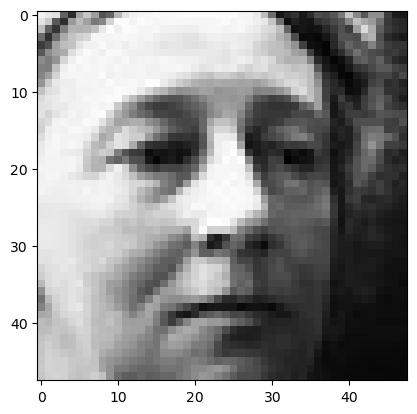

In [28]:
print("Original image is of Nervous")

# Load and preprocess the image
image_path = 'confident-unconfident/train/unconfident/Training_2913.jpg'
img = image.load_img(image_path, target_size=(48, 48), color_mode='grayscale')
img_array = image.img_to_array(img)
img_array /= 255.0  # Normalize pixel values
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Make prediction
pred = model.predict(img_array)

# Get the predicted label
pred_label = label[pred.argmax()]

# Print the predicted label
print("Model prediction is", pred_label)
plt.imshow(img, cmap = 'gray')

Original image is of Nervous
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
Model prediction is Nervous


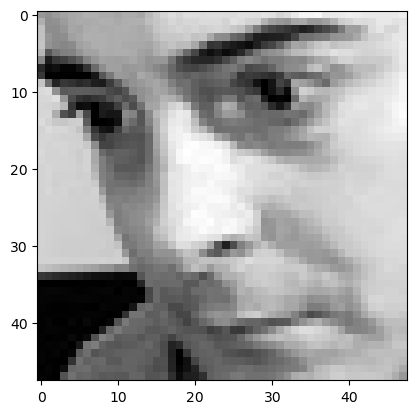

In [30]:
print("Original image is of Nervous")

# Load and preprocess the image
image_path = 'confident-unconfident/train/unconfident/Training_175233.jpg'
img = image.load_img(image_path, target_size=(48, 48), color_mode='grayscale')
img_array = image.img_to_array(img)
img_array /= 255.0  # Normalize pixel values
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Make prediction
pred = model.predict(img_array)

# Get the predicted label
pred_label = label[pred.argmax()]

# Print the predicted label
print("Model prediction is", pred_label)
plt.imshow(img, cmap = 'gray')

Original image is of confident
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
Model prediction is confident


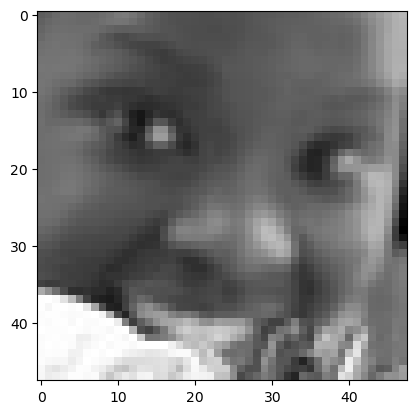

In [29]:
print("Original image is of confident")

# Load and preprocess the image
image_path = 'confident-unconfident/train/confident/Training_597242.jpg'
img = image.load_img(image_path, target_size=(48, 48), color_mode='grayscale')
img_array = image.img_to_array(img)
img_array /= 255.0  # Normalize pixel values
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Make prediction
pred = model.predict(img_array)

# Get the predicted label
pred_label = label[pred.argmax()]

# Print the predicted label
print("Model prediction is", pred_label)
plt.imshow(img, cmap = 'gray')

Original image is of confident
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
Model prediction is confident


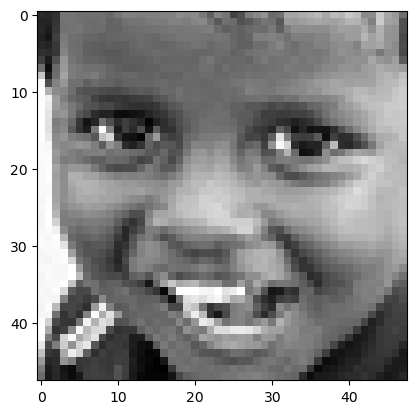

In [32]:
print("Original image is of confident")

# Load and preprocess the image
image_path = 'confident-unconfident/train/confident/Training_196501.jpg'
img = image.load_img(image_path, target_size=(48, 48), color_mode='grayscale')
img_array = image.img_to_array(img)
img_array /= 255.0  # Normalize pixel values
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Make prediction
pred = model.predict(img_array)

# Get the predicted label
pred_label = label[pred.argmax()]

# Print the predicted label
print("Model prediction is", pred_label)
plt.imshow(img, cmap = 'gray')